# PROJECT: ANALYSIS OF THE MOVIE DATABASE

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In [2]:
# set up your env
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

print('done')

done


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [150]:
df = pd.read_csv('./Datasets/tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [151]:
df.shape # 10866 rows, 21 columns

(10866, 21)

In [152]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [153]:
# columns with zero values which must be missing values
zero_cols = ['budget','revenue','runtime','budget_adj','revenue_adj']

# replace zero's with np.nan(pandas will ignore nan)
df[zero_cols] = df[zero_cols].apply(lambda cols: cols.replace(0, np.nan), axis=1)

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,5.170000e+03,4.850000e+03,10835.000000,10866.000000,10866.000000,10866.000000,5.170000e+03,4.850000e+03
mean,66064.177434,0.646441,3.073943e+07,8.922066e+07,102.362898,217.389748,5.974922,2001.322658,3.688774e+07,1.150774e+08
std,92130.136561,1.000185,3.890065e+07,1.620684e+08,30.946957,575.619058,0.935142,12.812941,4.195701e+07,1.988419e+08
min,5.000000,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10596.250000,0.207583,6.000000e+06,7.708081e+06,90.000000,17.000000,5.400000,1995.000000,8.102293e+06,1.046262e+07
50%,20669.000000,0.383856,1.700000e+07,3.182654e+07,99.000000,38.000000,6.000000,2006.000000,2.272271e+07,4.392749e+07
75%,75610.000000,0.713817,4.000000e+07,9.991823e+07,112.000000,145.750000,6.600000,2011.000000,5.007483e+07,1.315644e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [154]:
df.info()     # information about all non null values in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                5170 non-null   float64
 4   revenue               4850 non-null   float64
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10835 non-null  float64
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [156]:
df.isnull().sum()  # checking for all null values

id                         0
imdb_id                   10
popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                   31
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

### Data Cleaning 

In [120]:
# Cleaning Steps for the analysis of the movie Database

In [157]:
df.columns  # checkung all the column headers in the datasets

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [158]:
# dropping of columns

cols_to_drop = ['imdb_id','homepage', 'tagline', 'keywords', 'overview', 'production_companies']
df.drop(columns= cols_to_drop, inplace=True)

In [159]:
df.columns           # confirmation of dropped columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'director', 'runtime', 'genres', 'release_date', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

In [160]:
sum(df.duplicated()) # checking for duplicates

1

In [161]:
df.drop_duplicates(inplace=True) # dropping of duplicates

In [162]:
sum(df.duplicated())  # confirmation of dropped duplicates

0

In [163]:
# renaming of last two columns
df = df.rename(columns= {'budget_adj':'budget_2010','revenue_adj':'revenue_2010'})   
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_2010,revenue_2010
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


#### Split Genres string, at |, explode the list into rows

In [128]:
genres_df = df.assign(genres=df['genres'].str.split('|')).explode('genres')
genres_df.head(3)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_2010,revenue_2010
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Adventure,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Science Fiction,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [164]:
# Re-checking null values
df.isnull().sum() 

id                   0
popularity           0
budget            5696
revenue           6016
original_title       0
cast                76
director            44
runtime             31
genres              23
release_date         0
vote_count           0
vote_average         0
release_year         0
budget_2010       5696
revenue_2010      6016
dtype: int64

### Filling null values that are not numerical columns with "Not Applicable"

In [165]:
df['cast'].fillna("Not Applicable", inplace=True)

In [166]:
df['director'].fillna("Not Applicable", inplace=True)

In [167]:
df['genres'].fillna("Not Applicable", inplace=True)

In [168]:
df.isnull().sum()

id                   0
popularity           0
budget            5696
revenue           6016
original_title       0
cast                 0
director             0
runtime             31
genres               0
release_date         0
vote_count           0
vote_average         0
release_year         0
budget_2010       5696
revenue_2010      6016
dtype: int64

In [134]:
# all null values above are zeros except the ones we replaced their zeros with np.nan in zero_cols list

<a id='eda'></a>
## Exploratory Data Analysis


### Which Genres of movies were mostly produced over the years?

In [135]:
df[['genres']].value_counts()

genres                            
Comedy                                712
Drama                                 712
Documentary                           312
Drama|Romance                         289
Comedy|Drama                          280
                                     ... 
Comedy|Romance|Music                    1
Comedy|Romance|Horror                   1
Comedy|Romance|Fantasy|Drama            1
Comedy|Romance|Crime|Drama|Mystery      1
Western|Thriller                        1
Length: 2040, dtype: int64

In [249]:
# Comedy, Drama and Documentary genres of movies were mostly produced over the years

### What are the movie details with the highest popularity?

In [20]:
max_pop = df['popularity'].max()
max_pop

32.985763

In [21]:
df[df['popularity'] == max_pop]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_2010,revenue_2010
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


### What are the movie details with the highest Revenue?

In [22]:
max_rev = df['revenue'].max()
max_rev

2781505847

In [23]:
df[df['revenue'] == max_rev]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_2010,revenue_2010
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09


### What are the movie details with the highest budget?

In [24]:
max_bud = df['budget'].max()
max_bud

425000000

In [25]:
df[df['budget'] == max_bud]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_2010,revenue_2010
2244,46528,0.25054,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,12/2/10,74,6.4,2010,425000000.0,11087569.0


In [136]:
# Profit column was created as shown below for the two budgets and revenues

In [138]:
df['Profit'] = df['revenue'] - df['budget']
df['Profit_2010'] = df['revenue_2010'] - df['budget_2010']

In [139]:
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_2010,revenue_2010,Profit,Profit_2010
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.363529e+09,1.254446e+09


### What are the movie details with the highest Profit?

In [28]:
max_pro = df['Profit'].max()
max_pro

2544505847

In [29]:
df[df['Profit'] == max_pro]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_2010,revenue_2010,Profit
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09,2544505847


### What are the movie details with the highest vote count?

In [30]:
max_vot = df['vote_count'].max()
max_vot

9767

In [31]:
df[df['vote_count'] == max_vot]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_2010,revenue_2010,Profit
1919,27205,9.363643,160000000,825500000,Inception,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,Christopher Nolan,148,Action|Thriller|Science Fiction|Mystery|Adventure,7/14/10,9767,7.9,2010,160000000.0,825500000.0,665500000


### What are the properties associated with movies with highest Revenue?

In [49]:
## TOP TEN HIGHEST REVENUE MOVIES
mhr = df[['id', 'popularity', 'budget', 'original_title', 'cast', 'director', 'revenue','release_year', 'genres']].nlargest(n=10, columns= "revenue")
mhr

,id,popularity,budget,original_title,cast,director,revenue,release_year,genres
1386,19995,9.432768,237000000,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,2781505847,2009,Action|Adventure|Fantasy|Science Fiction
3,140607,11.173104,200000000,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,2068178225,2015,Action|Adventure|Science Fiction|Fantasy
5231,597,4.355219,200000000,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,1845034188,1997,Drama|Romance|Thriller
4361,24428,7.637767,220000000,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,1519557910,2012,Science Fiction|Action|Adventure
0,135397,32.985763,150000000,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,1513528810,2015,Action|Adventure|Science Fiction|Thriller
4,168259,9.335014,190000000,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,1506249360,2015,Action|Crime|Thriller
14,99861,5.944927,280000000,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,1405035767,2015,Action|Adventure|Science Fiction
3374,12445,5.711315,125000000,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,1327817822,2011,Adventure|Family|Fantasy
5422,109445,6.112766,150000000,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,1274219009,2013,Animation|Adventure|Family
5425,68721,4.946136,200000000,Iron Man 3,Robert Downey Jr.|Gwyneth Paltrow|Guy Pearce|D...,Shane Black,1215439994,2013,Action|Adventure|Science Fiction


### What are the properties associated with movies with highest Budget?

In [33]:
## TOP TEN HIGHEST BUDGET MOVIES
mhb = df[['id', 'popularity', 'budget', 'original_title', 'cast', 'director', 'revenue','release_year', 'genres']].nlargest(n=10, columns= "budget")
mhb

,id,popularity,budget,original_title,cast,director,revenue,release_year,genres
2244,46528,0.250540,425000000,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,11087569,2010,Adventure|Fantasy|Action|Western|Thriller
3375,1865,4.955130,380000000,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,1021683000,2011,Adventure|Action|Fantasy
7387,285,4.965391,300000000,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,Gore Verbinski,961000000,2007,Adventure|Fantasy|Action
14,99861,5.944927,280000000,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,1405035767,2015,Action|Adventure|Science Fiction
6570,1452,1.957331,270000000,Superman Returns,Brandon Routh|Kevin Spacey|Kate Bosworth|James...,Bryan Singer,391081192,2006,Adventure|Fantasy|Action|Science Fiction
1929,38757,2.865684,260000000,Tangled,Zachary Levi|Mandy Moore|Donna Murphy|Ron Perl...,Nathan Greno|Byron Howard,591794936,2010,Animation|Family
4411,49529,1.588457,260000000,John Carter,Taylor Kitsch|Lynn Collins|Mark Strong|Willem ...,Andrew Stanton,284139100,2012,Action|Adventure|Fantasy|Science Fiction
7394,559,2.520912,258000000,Spider-Man 3,Tobey Maguire|Kirsten Dunst|James Franco|Thoma...,Sam Raimi,890871626,2007,Fantasy|Action|Adventure
5508,57201,1.214510,255000000,The Lone Ranger,Johnny Depp|Armie Hammer|William Fichtner|Hele...,Gore Verbinski,89289910,2013,Action|Adventure|Western
634,122917,10.174599,250000000,The Hobbit: The Battle of the Five Armies,Martin Freeman|Ian McKellen|Richard Armitage|K...,Peter Jackson,955119788,2014,Adventure|Fantasy


## What are the movie titles with the highest Popularity?

In [34]:
## TOP TEN HIGHEST POPULARITY MOVIES
mhp = df[['id', 'popularity', 'budget', 'original_title', 'cast', 'director', 'revenue','release_year', 'genres']].nlargest(n=10, columns= "popularity")
mhp

,id,popularity,budget,original_title,cast,director,revenue,release_year,genres
0,135397,32.985763,150000000,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,1513528810,2015,Action|Adventure|Science Fiction|Thriller
1,76341,28.419936,150000000,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,378436354,2015,Action|Adventure|Science Fiction|Thriller
629,157336,24.949134,165000000,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,621752480,2014,Adventure|Drama|Science Fiction
630,118340,14.311205,170000000,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,James Gunn,773312399,2014,Action|Science Fiction|Adventure
2,262500,13.112507,110000000,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,295238201,2015,Adventure|Science Fiction|Thriller
631,100402,12.971027,170000000,Captain America: The Winter Soldier,Chris Evans|Scarlett Johansson|Sebastian Stan|...,Joe Russo|Anthony Russo,714766572,2014,Action|Adventure|Science Fiction
1329,11,12.037933,11000000,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,775398007,1977,Adventure|Action|Science Fiction
632,245891,11.422751,20000000,John Wick,Keanu Reeves|Michael Nyqvist|Alfie Allen|Wille...,Chad Stahelski|David Leitch,78739897,2014,Action|Thriller
3,140607,11.173104,200000000,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,2068178225,2015,Action|Adventure|Science Fiction|Fantasy
633,131631,10.739009,125000000,The Hunger Games: Mockingjay - Part 1,Jennifer Lawrence|Josh Hutcherson|Liam Hemswor...,Francis Lawrence,752100229,2014,Science Fiction|Adventure|Thriller


In [186]:
genres_df.groupby('genres')[['revenue_2010']].mean()

,revenue_2010
genres,
Action,1.736125e+08
Adventure,2.472174e+08
Animation,2.514516e+08
Comedy,1.025823e+08
Crime,9.920530e+07
Documentary,1.151245e+07
Drama,8.460228e+07
Family,2.105339e+08
Fantasy,2.210206e+08


In [188]:
genres_df.groupby('genres')[['popularity']].mean()

,popularity
genres,
Action,0.926274
Adventure,1.154259
Animation,0.852182
Comedy,0.592607
Crime,0.744930
Documentary,0.181432
Drama,0.591495
Family,0.786668
Fantasy,0.992840


## Visualizations

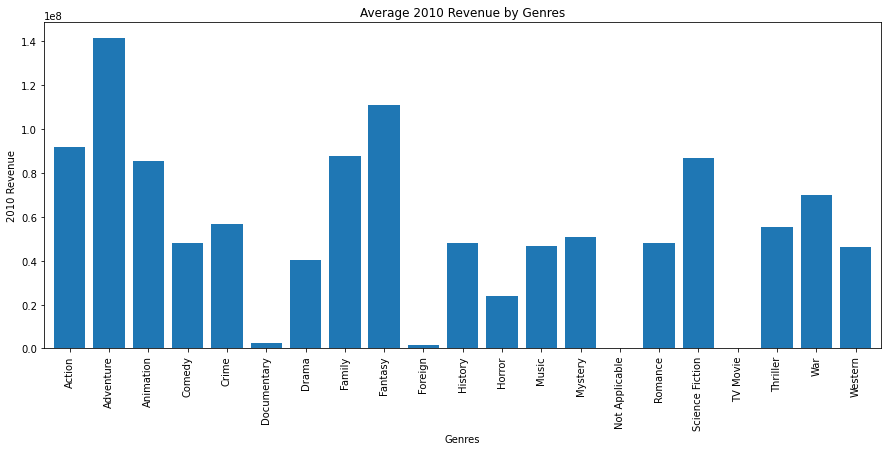

In [73]:
genres_df.groupby('genres')['revenue_2010'].mean().plot(kind='bar',figsize=[15,6], rot=0, width=0.8)
plt.xticks(rotation=90)
plt.title('Average 2010 Revenue by Genres')
plt.xlabel('Genres')
plt.ylabel('2010 Revenue');

In [172]:
# In the above plot, Action followed by fantasy are on the average the genres of movies with the highest 2010 Revenue

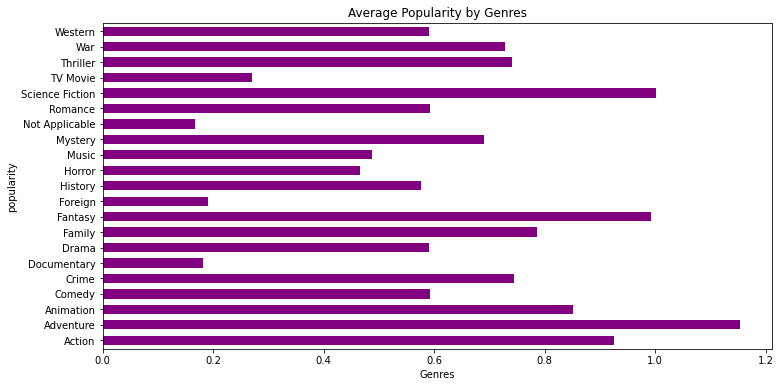

In [72]:
genres_df.groupby('genres')['popularity'].mean().plot(kind='barh', color=['purple'], width=0.6, figsize=[12,6], rot=0)
plt.title('Average Popularity by Genres')
plt.xlabel('Genres')
plt.ylabel('popularity');

In [173]:
# In the above plot, Adventure followed by Science Fiction are on the average the genres of movies with the highest popularity

In [174]:
# To avoid repetitive coding, I created a function below

def myScatterPlot(df,xVar,yVar): 
    df.plot(kind='scatter', x=xVar, y=yVar, figsize=[12,6], s=10)

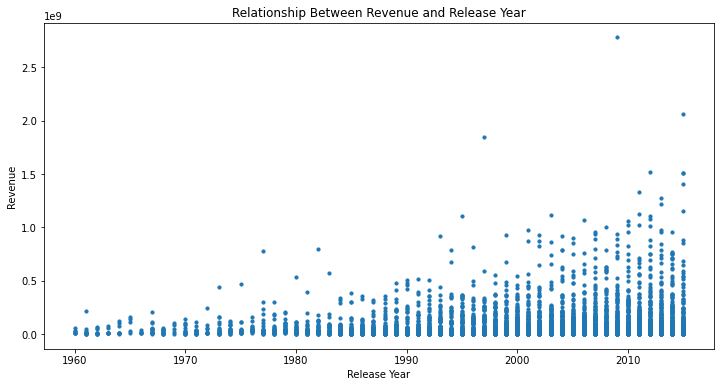

In [175]:
# calling out the function
myScatterPlot(df,'release_year', 'revenue')
plt.title("Relationship Between Revenue and Release Year")
plt.xlabel('Release Year')
plt.ylabel('Revenue');

In [142]:
# The above plot shows th revenue increased significantly over the years

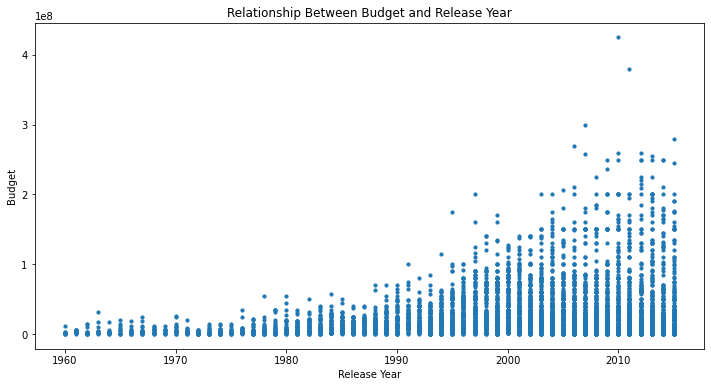

In [176]:
# Calling out the function for another plot
myScatterPlot(df,'release_year', 'budget')
plt.title("Relationship Between Budget and Release Year")
plt.xlabel('Release Year')
plt.ylabel('Budget');

In [143]:
#  The above plot indicates that the cost expended on movie production increased significantly over the years

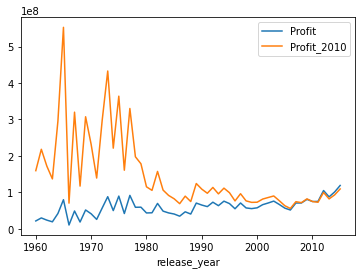

In [141]:
df.groupby('release_year')[['Profit','Profit_2010']].mean().plot();

In [144]:
# In the above plot, there's a huge difference between the profit realized as a result of inflation and the normal profit

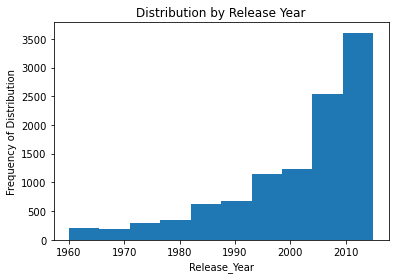

In [146]:
df['release_year'].plot(kind='hist')
plt.title("Distribution by Release Year")
plt.xlabel("Release_Year")
plt.ylabel("Frequency of Distribution");        # the distribution is skewed to the left

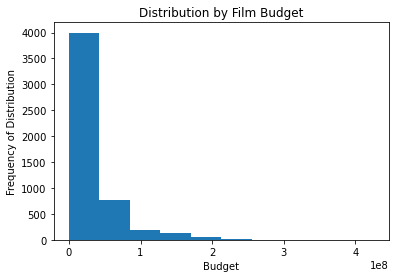

In [147]:
df['budget'].plot(kind='hist')
plt.title("Distribution by Film Budget")
plt.xlabel("Budget")
plt.ylabel("Frequency of Distribution");       # the distribution is skewed to the right

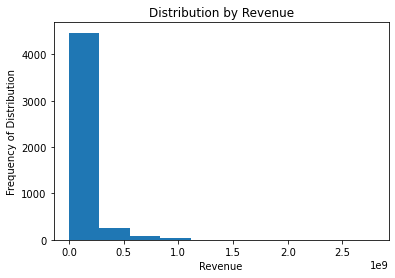

In [148]:
df['revenue'].plot(kind='hist');
plt.title("Distribution by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Frequency of Distribution");  # the distribution is skewed to the right

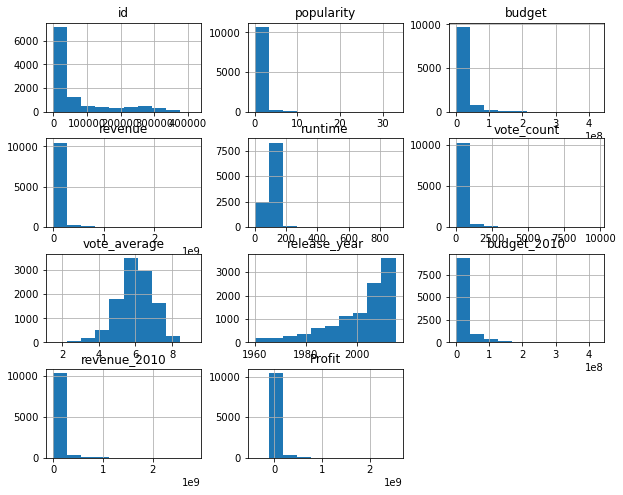

In [171]:
df.hist(figsize=(10,8));

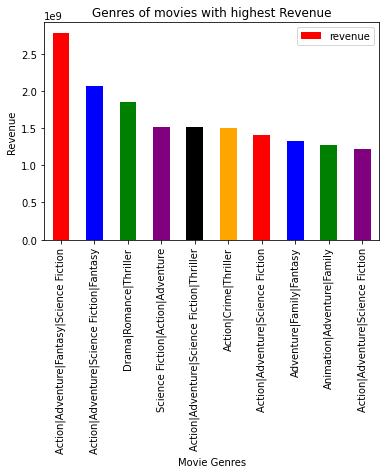

In [177]:
colors = ['red','blue','green','purple', 'black','orange']

mhr.plot(x='genres', y='revenue', color= colors, kind='bar')
plt.title("Genres of movies with highest Revenue")
plt.xlabel("Movie Genres")
plt.ylabel("Revenue");

In [179]:
# In the above plot, Action|Adventure|Fantasy|Science Fiction is the genres of movies with the highest Revenue

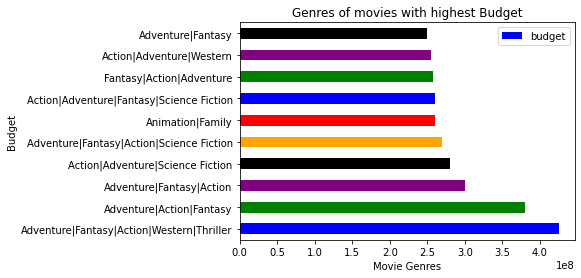

In [41]:
colors = ['blue','green','purple', 'black','orange','red']

mhb.plot(x='genres', y='budget', color= colors, kind='barh')
plt.title("Genres of movies with highest Budget")
plt.xlabel("Movie Genres")
plt.ylabel("Budget");

In [181]:
# In the above plot, Adventure|Fantasy|Action|Western|Thriller is the genres of movies with the highest Budget

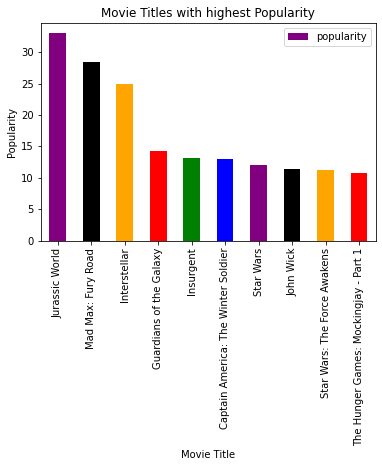

In [42]:
colors = ['purple', 'black','orange','red','green','blue']

mhp.plot(x='original_title', y='popularity', color= colors, kind='bar');
plt.title("Movie Titles with highest Popularity")
plt.xlabel("Movie Title")
plt.ylabel("Popularity");

In [182]:
# In the above plot, Jurassic World is the movie with the highest popularity

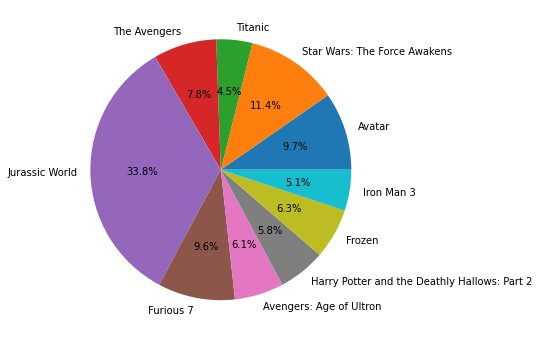

In [225]:
plt.figure(figsize=(10,6))
plt.pie(mhr.popularity, autopct="%0.1f%%", labels = mhr.original_title) 
plt.show()

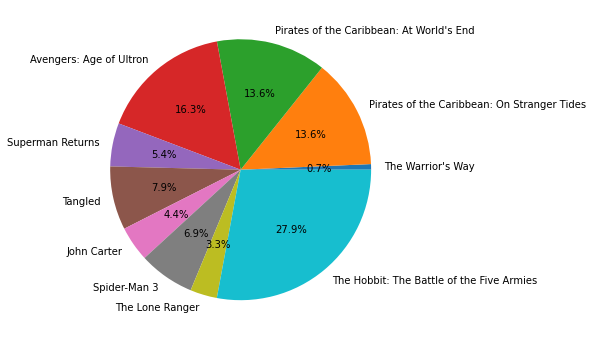

In [226]:
plt.figure(figsize=(10,6))
plt.pie(mhb.popularity, autopct="%0.1f%%", labels = mhb.original_title) 
plt.show()

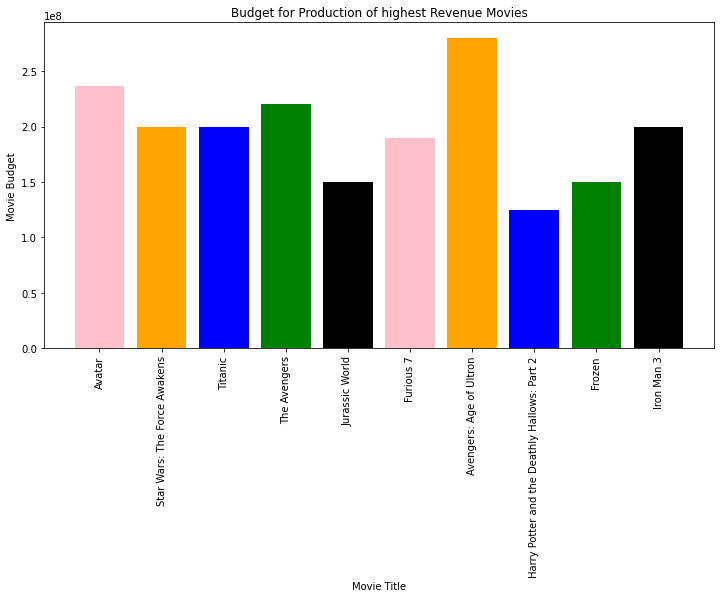

In [241]:
x=mhr.original_title
y=mhr.budget
colors = ['pink','orange', 'blue', 'green','black']

plt.figure(figsize=(12,6))
plt.bar(x,y, color=colors)
plt.title("Budget for Production of highest Revenue Movies")
plt.xlabel("Movie Title")
plt.ylabel("Movie Budget")
plt.xticks(rotation=90)
plt.show()

In [183]:
# In the above plot, Avengers:Age of Ultron is the movie with the highest budget amongst highest revenue movies

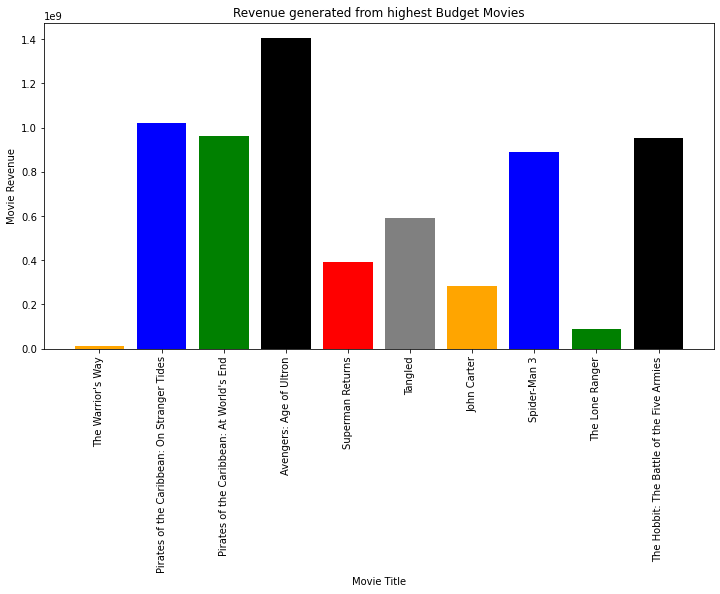

In [244]:
x=mhb.original_title
y=mhb.revenue
colors = ['orange', 'blue', 'green','black','red','grey']

plt.figure(figsize=(12,6))
plt.bar(x,y, color=colors)
plt.title("Revenue generated from highest Budget Movies")
plt.xlabel("Movie Title")
plt.ylabel("Movie Revenue")
plt.xticks(rotation=90)
plt.show()

In [184]:
# In the above plot, Avengers:Age of Ultron is the movie with the highest revenue amongst highest budget movies

In [245]:
df.revenue.mean()

39826896.07685228

In [246]:
df.budget.mean()

14624286.06433502